In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
#visualize multiline regression
#seaborn memiliki dataset contoh, misal yang namanya tips 
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


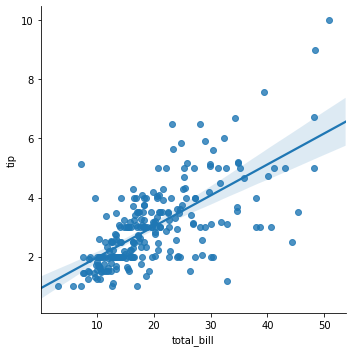

In [4]:
#melihat scatter plot dari tip and total_bill
#garis menandakan linear regression
sns.lmplot('total_bill', 'tip', tips)

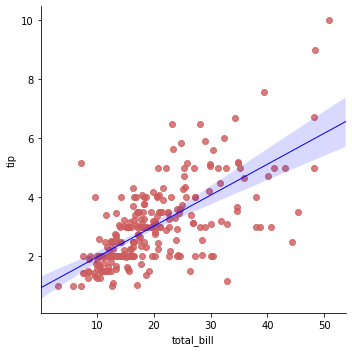

In [5]:
#memisahkan yang mana linear yang mana scatter plot
#apa kegunaanda dari marker: o (?) apakah membuat semua poin di scatter berbentuk o? karena kalau saya ubah jadi bentuk x jadi tidak berguna
#sepertinya mengganti-ganti marker tidak berguna sama sekali
sns.lmplot('total_bill', 'tip', tips,
          scatter_kws={'marker': 'o', 'color':'indianred'},
          line_kws={'linewidth':1, 'color': 'blue'})

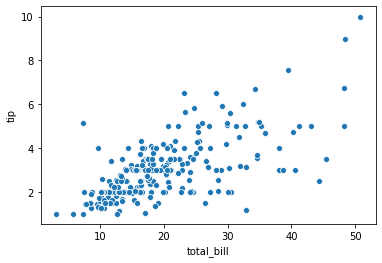

In [6]:
#kalau ingin menampikan scatterplot saja
#ternyata harus di-define x dan y dulu, kemudian harus di-defina data juga
#bagaimana kalau parameternya diganti? 
sns.scatterplot(x='total_bill',y='tip',data=tips)

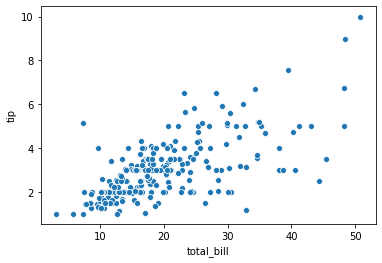

In [7]:
#jika paramter diganti juga bisa
sns.scatterplot(data=tips, x='total_bill', y='tip')

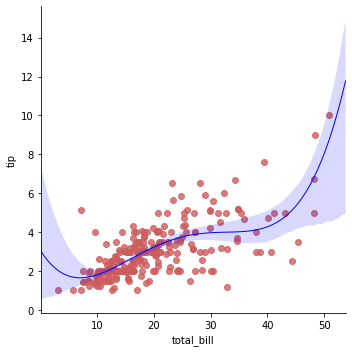

In [8]:
#order atau polinomial menjadi 4 
sns.lmplot('total_bill', 'tip', tips, order=4,
          scatter_kws={'marker': 'o', 'color':'indianred'},
          line_kws={'linewidth':1, 'color': 'blue'})

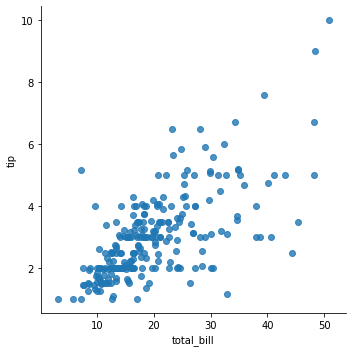

In [9]:
#selain dengan menggunakan method scatterplot, menggunakan method lmplot juga bisa menampilkan scatterplot
sns.lmplot('total_bill','tip',tips,fit_reg=False)

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
tips['tip_pect'] = 100*(tips['tip']/tips['total_bill'])

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


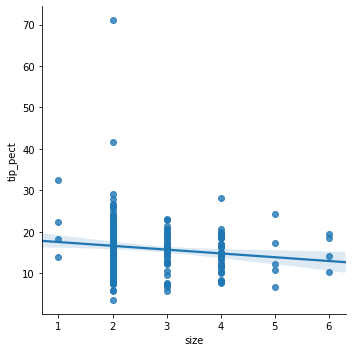

In [13]:
#melihat hubungan antara persentase tip dengan ukutan (ukuran apa juga sebenarnya saya tidak tahu)
sns.lmplot('size','tip_pect',tips)

In [14]:
#menggunakan Jitter, sebenarnya tidak tahu Jitter itu apa
#link-nya adalah seperti ini: 
url = "http://en.wikipedia.org/wiki/Jitter"

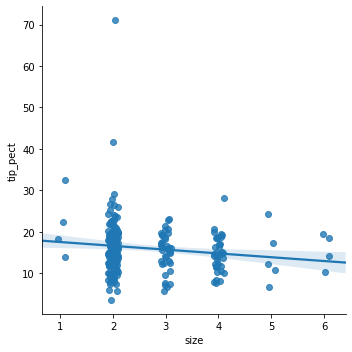

In [15]:
#masih tidak tahu apa kegunaan dari jitter
sns.lmplot('size','tip_pect',tips,x_jitter=.1)

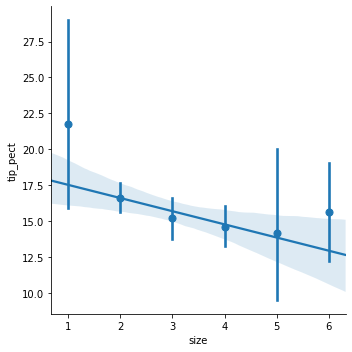

In [16]:
#melihat ukuran variance atau seberapa besar data point daris setiap bin
#sejujurnya tidak begitu mengerti maksud dari grafik ini apa
#cuma terlihat dan saya dapatkan pula informasi dari catatan bahwa size 1 memiliki variance yang lebih banyak dari size 2 sampai 4
sns.lmplot('size','tip_pect',tips,x_estimator=np.mean)

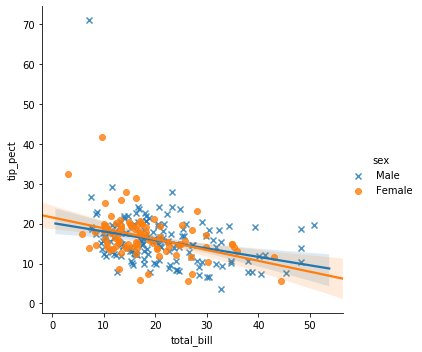

In [17]:
#kita juga bisa menentukan tiga variabel
sns.lmplot('total_bill', 'tip_pect',tips, hue='sex',markers=['x','o'])

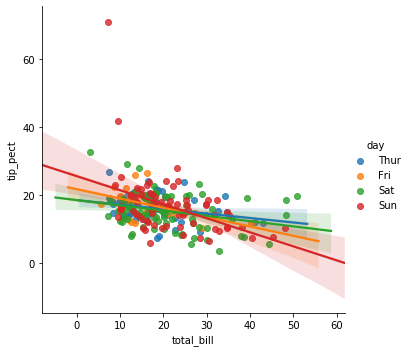

In [18]:
#melakukannya dengan variabel day juga
sns.lmplot("total_bill", "tip_pect", tips, hue="day")

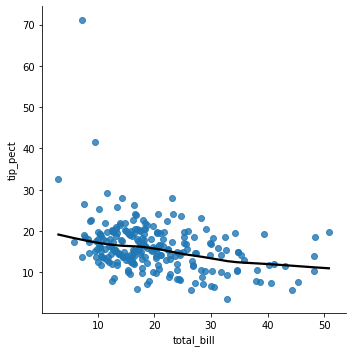

In [19]:
#bisa pula melakukan local regression (walau tidak tahu apa kegunaan dari local regression)
sns.lmplot("total_bill","tip_pect",tips, lowess=True, line_kws={"color": "black"})

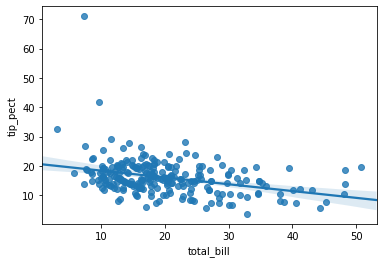

In [20]:
#lmplot sebenarnya menggunakan lower level function untuk membuat regression plot, low-level function tersebut adalah regplot()
#lower level function adalah fungsi yang digunakan di dalam fungsi, artinya di dalam fungsi lmplot, ada regplot untuk define regression

#katanya regplot lebih kuat dibandingkan dengan lmplot
#kalau kita punya dua subplot saja, bisa menggunakan regplot (?)

#kalau kita tidak ingin melakukan modifikasi juga lebih baik menggunakan regplot
sns.regplot('total_bill','tip_pect',tips)

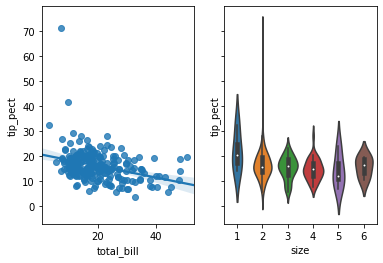

In [21]:
fig, (axis1,axis2) = plt.subplots(1,2,sharey=True)

sns.regplot('total_bill','tip_pect',tips,ax=axis1)
#parameter violinplot berbeda dari di materi, karena Python3
sns.violinplot(y=tips['tip_pect'],x=tips['size'],pallete='Reds_r',ax=axis2)

#tidak begitu mengerti apa kegunaan dari fig dan juga axis
#kemungkinan tutor hanya ingin menunjukkan perbedaan dari subplot

## Heatmap and Clustered Matrices

In [22]:
#load dataset untuk melihat dframe
flight_dframe=sns.load_dataset('flights')

In [23]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [24]:
#stack artinya mendikte satu-satu dari dataframe yang diberikan
flight_dframe.stack()

0    year               1949
     month           January
     passengers          112
1    year               1949
     month          February
     passengers          118
2    year               1949
     month             March
     passengers          132
3    year               1949
     month             April
     passengers          129
4    year               1949
     month               May
     passengers          121
5    year               1949
     month              June
     passengers          135
6    year               1949
     month              July
     passengers          148
7    year               1949
     month            August
     passengers          148
8    year               1949
     month         September
     passengers          136
9    year               1949
     month           October
     passengers          119
                     ...    
134  year               1960
     month             March
     passengers          419
135  year     

In [25]:
#melakukan pivoting agar dframe lebih mudah dibaca
#membagi passenger berdasarkan bulan dan tahun
flight_dframe=flight_dframe.pivot('month','year','passengers')

In [26]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


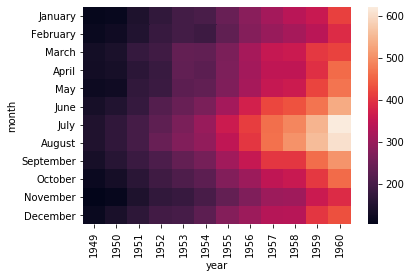

In [27]:
sns.heatmap(flight_dframe)

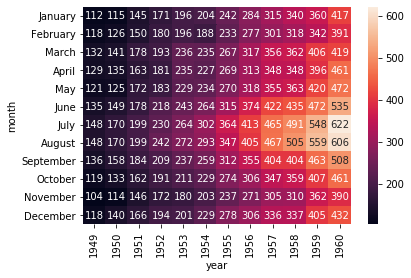

In [28]:
#kita juga bisa melihat nilai angka dari tiap sel
#apa kegunaand dari fmt? sebelum ada fmt angka terlihat tidak beraturan
#fmt digunakan untuk formatting 
#menurut dokumentasi fmt merupakan string formatting, fmt=d artinya format string merupakan decimal
#lebih lanjut mengenai string formatting ada di https://python-reference.readthedocs.io/en/latest/docs/functions/format.html
#kalau x itu merupakan hexadecimal dan o merupakan octal
sns.heatmap(flight_dframe,annot=True, fmt='d')

In [29]:
#seaborn seacra automatis menentukan skema warna dari data yang kita buat
#seperti contohnya di atas, warna dari gelap ke terang
#tapi kita bisa membuat skema warna kita sendiri, misal warna berpusat dimana dsb

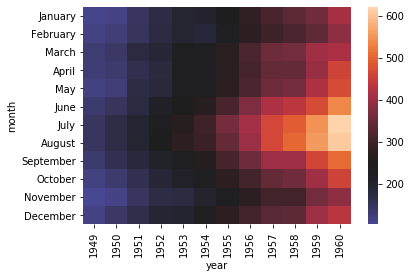

In [30]:
#berpusat di tengahm terutama di Januari 1955
#semakin rendah maka akan semakin biru, sedangkan semakin tinggi maka akan semakin merah bahkan menuju ke putih
sns.heatmap(flight_dframe, center=flight_dframe.loc['January',1955])

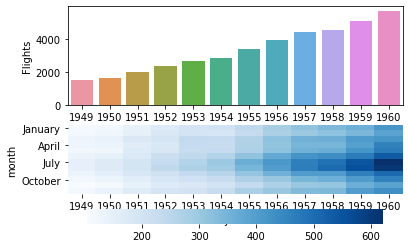

In [59]:
#membuat heatmap dengan menggunakan subplot (?)
#apa itu subplot? 

#menurut saya subplot adalah fungsi yang digunakan utnuk membuat plot lebih dari satu 
#plot merupakan grafik? 

#dalam hal ini ada dua baris dan 1 kolom
#menurut definisi disini axis1 merupakan plot pertama dan axis2 merupakan plot kedua (?)
f,(axis1,axis2) = plt.subplots(2,1)

#menghitung sum dari tiap kolom, kolomnya merupakan tahun 
yearly_flight = flight_dframe.sum()

#membuat dua series dan dataframe untuk menyesuaikan bentuk dari index

#yearly_flight.index.values cuma menyimpan value dari index yaitu berupa tahun, belum menyimpan data sum-nya
years = pd.Series(yearly_flight.index.values)
years = pd.DataFrame(years)

#maka dari itu ketika kita memanggil years, yang mana merupakan sebuah dataframe, akan mengembalikan dframe dengan value nilai tahun
#years

#yang ini cuma menyimpan value tapi tidak menyimpan tahun berapanya
flights = pd.Series(yearly_flight.values)
flights = pd.DataFrame(flights)

#membuat dframe yang digabungkan 
#apa kegunaan axis=1? saya harus ingat, axis=1 digunakan untuk membuat hasil year_dframe berupa dataframe
#kalau tidak ada axis=1, maka hasilnya adalah berupa Series, dan untuk kasus ini, akan error
#Mengapa error? karena yang kita concat memiliki tipe data years dan flights
year_dframe = pd.concat((years,flights), axis=1)
year_dframe.columns = ['Year', 'Flights']

#buat barplot dulu pertama
#ax digunakan untuk menentukan posisi 
sns.barplot(x='Year', y='Flights', data=year_dframe, ax=axis1)
#terlihat dari dekade ke dekade jumlah penerbangan bertambah 

#kemudian akan dibuat heatmap 
#flight_dframe sudah didefinisikan pada sel sebelumnya

#terutama di kisaran bulan juni-july penerbangan semakin banyak
#mungkin memang karena bulan tersebut merupakan bulan-bulan summer kali ya 

#cmap=Blues untuk menentukan warna 
#cbar_kws untuk menentukan posisi dari legend. horizontal artinya posisi legend-nya horizontal
#sepertinya terlihat tidak semua bulan yang ditampilkan
#bagaimana kalau ingin menampilkan semua bulan? saya kira hal ini adalah pembahasan untuk berikutnya 
sns.heatmap(flight_dframe, cmap='Blues', ax=axis2, cbar_kws={"orientation":"horizontal"})

In [ ]:
#penggunaan clustermap

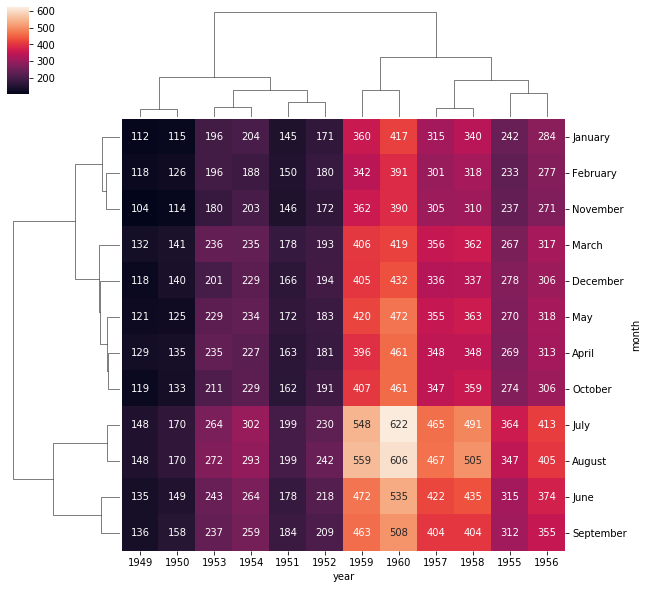

In [61]:
#clustermap akan membagi data menjadi beberapa klaster atau kelompok
#baik dari baris maupun kolom

#mungkin ini adalah pembagian kelompok yang mana yang memiliki angka penerbangan di bawah 300, yang mana di atas 300
#pada baris ada klaster lagi, tapi masih belum diketahui untuk apa klaster tersebut 
sns.clustermap(flight_dframe, annot=True, fmt='d')

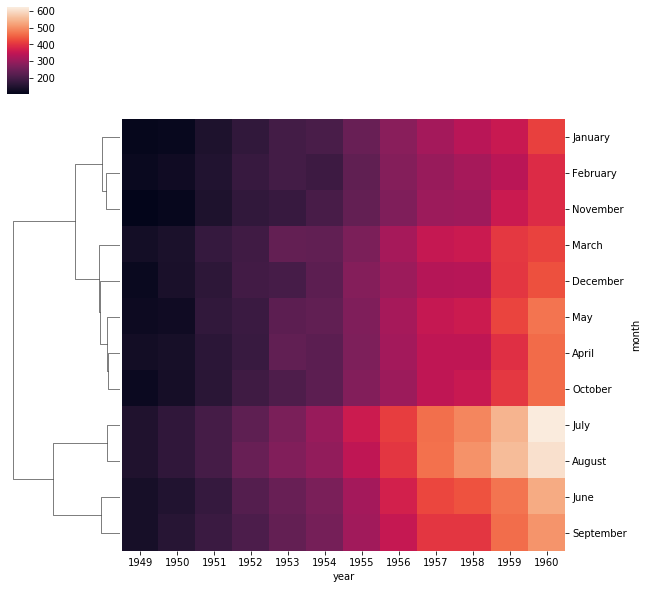

In [62]:
#kita bisa melakukan uncluster, misal melakukan uncluster dari kolom
sns.clustermap(flight_dframe, col_cluster=False)

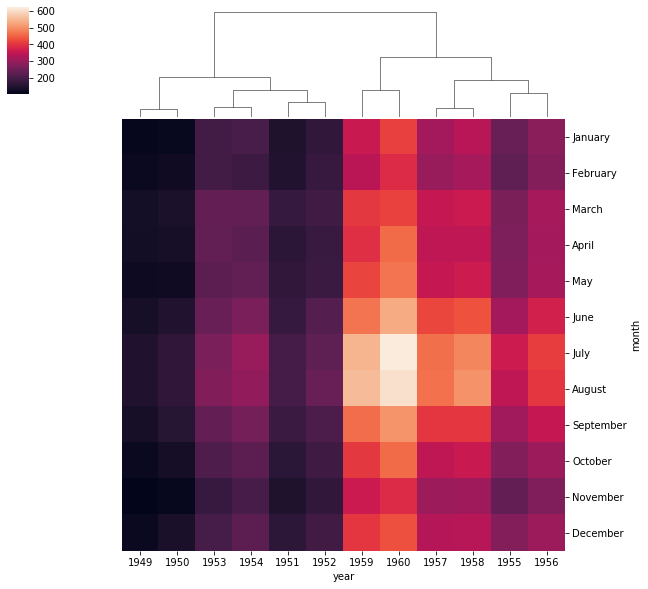

In [63]:
#bagaimana kalau mau uncluster baris? 
#menggunakan parameter row_cluster
sns.clustermap(flight_dframe, row_cluster=False)

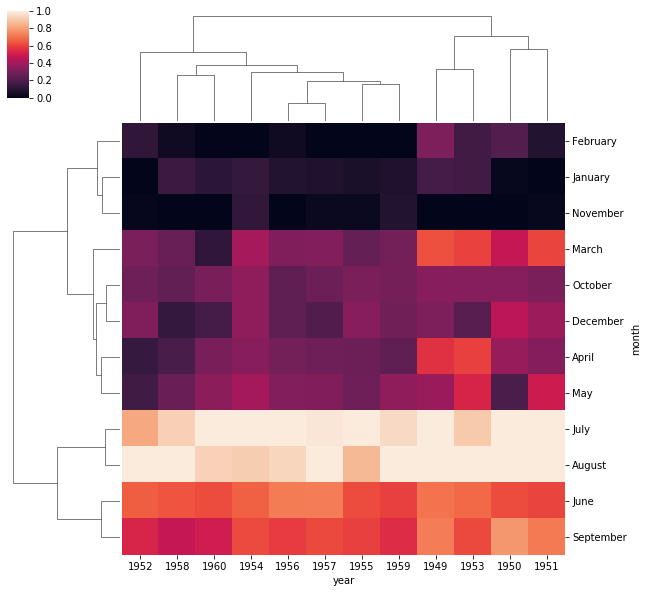

In [68]:
#melakukan standarisasi berdasarkan tahun
#standard scale 1 artinya berdasarkan axis 1, yaitu kolom, dalam hal ini merupakan tahun

#tapi tetap tidak begitu mengerti 
#kata tutor, ini bisa menyelesaikan masalah karena flight increasing every single year
#cuma bagi saya, dikarenakan setiap warna berganti di setiap selnya, seharusnya tidak berpengaruh, 
#meskipun memang perbedaan warna di satu barus dengan yang lainnya tidak berbeda secara signifikan
sns.clustermap(flight_dframe, standard_scale=1)

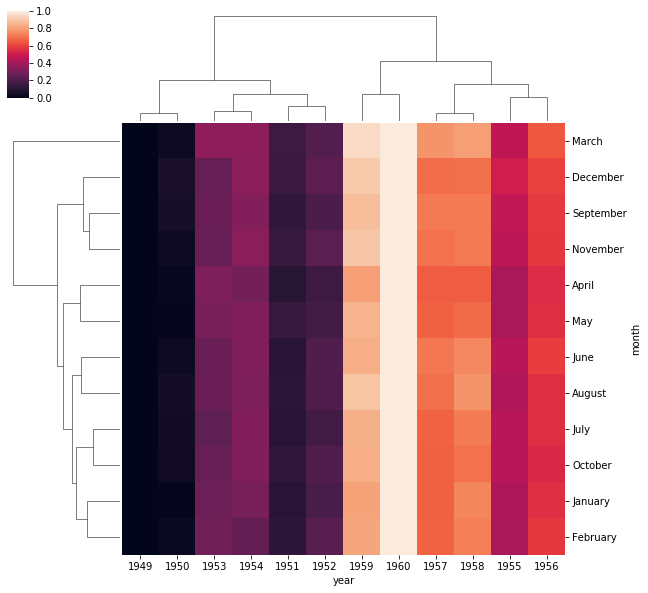

In [69]:
#standarisasi dari baris 
#terlihat memang 1960 adalah yang paling banyak daripada yang lain
sns.clustermap(flight_dframe, standard_scale=0)

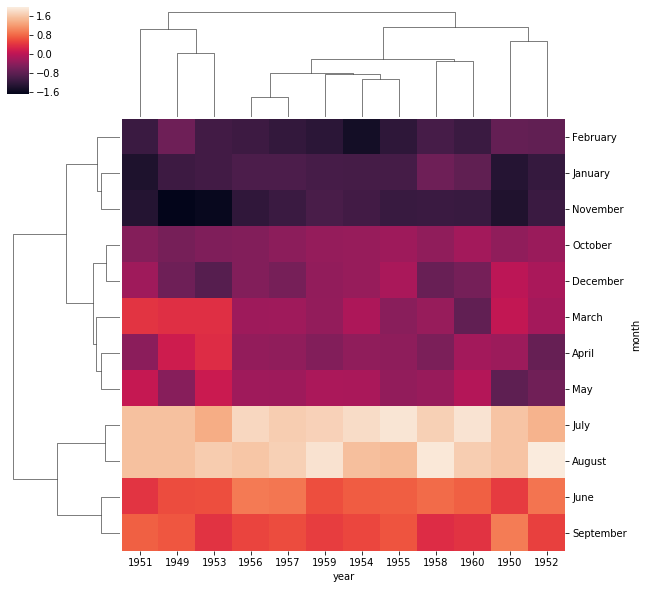

In [70]:
#melakukan normalisasi dengan menggunakan z score
#z score 1 artinya z score dari kolom atau tahun
sns.clustermap(flight_dframe, z_score=1)

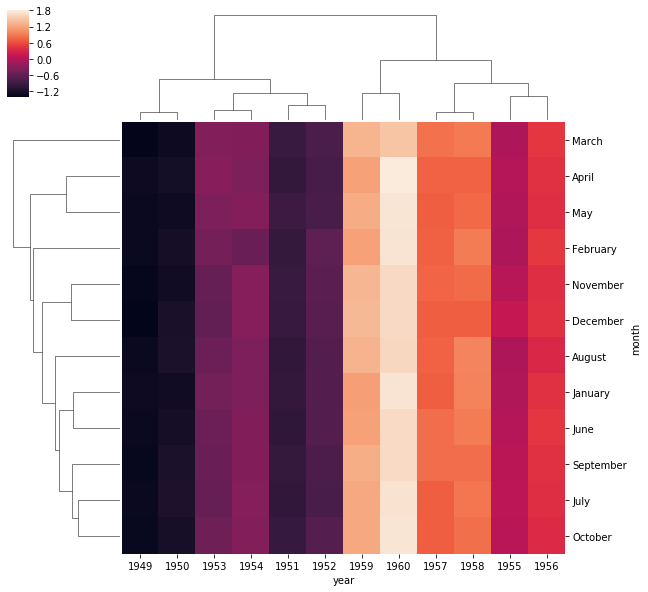

In [71]:
sns.clustermap(flight_dframe, z_score=0)